# MANTILLA Omar Augusto - INDIVIDUAL PROJECT

In [2]:
# Loading Libraries

# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # SVM
library(tidyverse)
library(dplyr)
library(plyr)
library(caTools)
library(naivebayes)
library(psych)
library(kernlab)
library(rpart)
library(rpart.plot)
library(randomForest)
library(Boruta)
# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset
library(tidyverse)
library(leaps)

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)
#par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Attaching package: 'e1071'


The following object is masked from 'package:mlr':

    impute


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ------------------------------------

In [2]:
# Reading the bank_mkt_train.csv file
bank <- read.csv('C:/Users/omantilla/OneDrive - IESEG/Documents/IESEG/Semester 2/Statical Machine Learning/Individual Project/MANTILLA_Omar_Augusto/Data/bank_mkt_train.csv')
bank

client_id,age,job,marital,education,default,housing,loan,contact,month,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
29925,42,management,married,basic.9y,no,no,no,cellular,jul,⋯,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
37529,35,unemployed,married,university.degree,no,yes,no,telephone,jun,⋯,4,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2757,44,technician,married,basic.9y,no,yes,yes,cellular,may,⋯,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
9642,45,services,married,high.school,no,yes,no,cellular,apr,⋯,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
14183,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
15180,38,technician,married,professional.course,no,no,no,telephone,may,⋯,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
27168,33,technician,married,professional.course,no,no,yes,cellular,apr,⋯,1,NA,1,failure,-1.8,93.075,-47.1,1.405,5099.1,1
9097,38,blue-collar,single,basic.9y,unknown,yes,no,telephone,may,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
30538,29,blue-collar,single,unknown,no,yes,no,cellular,may,⋯,1,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0


### DATA EXPLORATION

In [3]:
# Number of Unique clients
unique(bank[c("client_id")])

,client_id
,<int>
1,29925
2,37529
3,2757
4,9642
5,14183
6,15180
7,27168
8,9097
9,30538


In [4]:
# Checking the total of Nas in the  Bank dataset
sum(is.na(bank))

[1] 3664

There are a lot of NA so I will treat them to avoid get rid of them

In [5]:
names(which(colSums(is.na(bank))>0))

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "campaign"       "pdays"         
[13] "previous"       "poutcome"       "emp.var.rate"   "cons.price.idx"
[17] "cons.conf.idx"  "euribor3m"      "nr.employed"

In [6]:
# Renaming some columns
names(bank)[names(bank) == "emp.var.rate"] <- "emp_var_rate"
names(bank)[names(bank) == "cons.price.idx"] <- "cons_price_idx"
names(bank)[names(bank) == "cons.conf.idx"] <- "cons_conf_idx"
names(bank)[names(bank) == "nr.employed"] <- "nr_employed"


In [7]:
# Checm the data structure
str(bank)

'data.frame':	20000 obs. of  21 variables:
 $ client_id     : int  29925 37529 2757 9642 14183 15180 27168 9097 30538 28981 ...
 $ age           : int  42 35 44 45 45 38 33 38 29 34 ...
 $ job           : chr  "management" "unemployed" "technician" "services" ...
 $ marital       : chr  "married" "married" "married" "married" ...
 $ education     : chr  "basic.9y" "university.degree" "basic.9y" "high.school" ...
 $ default       : chr  "no" "no" "no" "no" ...
 $ housing       : chr  "no" "yes" "yes" "yes" ...
 $ loan          : chr  "no" "no" "yes" "no" ...
 $ contact       : chr  "cellular" "telephone" "cellular" "cellular" ...
 $ month         : chr  "jul" "jun" "may" "apr" ...
 $ day_of_week   : chr  "thu" "mon" "mon" "tue" ...
 $ campaign      : int  1 4 1 1 1 2 1 1 1 1 ...
 $ pdays         : int  999 999 999 999 999 999 NA 999 999 999 ...
 $ previous      : int  0 0 0 0 0 0 1 0 1 0 ...
 $ poutcome      : chr  "nonexistent" "nonexistent" "nonexistent" "nonexistent" ...
 $ emp_var_r

### Replace the NAs from the different values

In [8]:
# Replace int and num values with mean
bank$age[is.na(bank$age)]<-mean(bank$age,na.rm=TRUE)
bank$campaign[is.na(bank$campaign)]<-mean(bank$campaign,na.rm=TRUE)
bank$pdays[is.na(bank$pdays)]<-mean(bank$pdays,na.rm=TRUE)
bank$previous[is.na(bank$previous)]<-mean(bank$previous,na.rm=TRUE)
bank$emp_var_rate[is.na(bank$emp_var_rate)]<-mean(bank$emp_var_rate,na.rm=TRUE)
bank$cons_price_idx[is.na(bank$cons_price_idx)]<-mean(bank$cons_price_idx,na.rm=TRUE)
bank$cons_conf_idx[is.na(bank$cons_conf_idx)]<-mean(bank$cons_conf_idx,na.rm=TRUE)
bank$euribor3m[is.na(bank$euribor3m)]<-mean(bank$euribor3m,na.rm=TRUE)
bank$nr_employed[is.na(bank$nr_employed)]<-mean(bank$nr_employed,na.rm=TRUE)

# Source https://www.tutorialspoint.com/how-to-replace-na-values-in-columns-of-an-r-data-frame-form-the-mean-of-that-column#:~:text=That%20means%20if%20we%20have,argument%20along%20with%20the%20same.

In [9]:
# Remove the remaining observations with NA
bank <- na.omit(bank) 
# Source: https://statisticsglobe.com/r-remove-data-frame-rows-with-some-or-all-na

In [10]:
# ReOrder columns
col_order <- c("client_id", "age", "campaign","pdays", 
               "previous","emp_var_rate","cons_price_idx","cons_conf_idx",
               "euribor3m","nr_employed","subscribe","job","marital",
               "education","default","housing","loan","contact","month","day_of_week","poutcome")
bank2 <- bank[, col_order]
bank2

,client_id,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,⋯,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,29925,42,1,999.0000,0,1.4,93.918,-42.7,4.968,5228.1,⋯,management,married,basic.9y,no,no,no,cellular,jul,thu,nonexistent
2,37529,35,4,999.0000,0,1.4,94.465,-41.8,4.960,5228.1,⋯,unemployed,married,university.degree,no,yes,no,telephone,jun,mon,nonexistent
3,2757,44,1,999.0000,0,-1.8,92.893,-46.2,1.264,5099.1,⋯,technician,married,basic.9y,no,yes,yes,cellular,may,mon,nonexistent
4,9642,45,1,999.0000,0,-1.8,93.075,-47.1,1.453,5099.1,⋯,services,married,high.school,no,yes,no,cellular,apr,tue,nonexistent
5,14183,45,1,999.0000,0,1.1,93.994,-36.4,4.859,5191.0,⋯,unknown,married,unknown,unknown,unknown,unknown,telephone,may,wed,nonexistent
6,15180,38,2,999.0000,0,1.1,93.994,-36.4,4.858,5191.0,⋯,technician,married,professional.course,no,no,no,telephone,may,wed,nonexistent
7,27168,33,1,961.4132,1,-1.8,93.075,-47.1,1.405,5099.1,⋯,technician,married,professional.course,no,no,yes,cellular,apr,fri,failure
8,9097,38,1,999.0000,0,1.1,93.994,-36.4,4.857,5191.0,⋯,blue-collar,single,basic.9y,unknown,yes,no,telephone,may,wed,nonexistent
9,30538,29,1,999.0000,1,-1.8,92.893,-46.2,1.250,5099.1,⋯,blue-collar,single,unknown,no,yes,no,cellular,may,fri,failure


### Encode Categorical Variables

In [11]:
new_df <- bank2

new_df$job <- factor(new_df$job, exclude = NULL)
new_df$marital <- factor(new_df$marital, exclude = NULL)
new_df$education <- factor(new_df$education, exclude = NULL)
new_df$default <- factor(new_df$default, exclude = NULL)
new_df$housing <- factor(new_df$housing, exclude = NULL)
new_df$loan <- factor(new_df$loan, exclude = NULL)
new_df$contact <- factor(new_df$contact, exclude = NULL)
new_df$month <- factor(new_df$month, exclude = NULL)
new_df$day_of_week <- factor(new_df$day_of_week, exclude = NULL)
new_df$poutcome <- factor(new_df$poutcome, exclude = NULL)

new_df <- model.matrix(~.-1, data = new_df[, c("job", "marital","education","default","housing","loan","contact","month","day_of_week","poutcome")],
                       contrasts.arg = list(
                         job = contrasts(new_df$job, contrasts = FALSE),
                         marital = contrasts(new_df$marital, contrasts = FALSE),
                         education = contrasts(new_df$education, contrasts = FALSE),
                         default = contrasts(new_df$default, contrasts = FALSE),
                         housing = contrasts(new_df$housing, contrasts = FALSE),
                         loan = contrasts(new_df$loan, contrasts = FALSE),
                         contact = contrasts(new_df$contact, contrasts = FALSE),
                         month = contrasts(new_df$month, contrasts = FALSE),
                         day_of_week = contrasts(new_df$day_of_week, contrasts = FALSE),
                         poutcome = contrasts(new_df$poutcome, contrasts = FALSE)
                       ))

# Put all Columns together
bank3 <- cbind(bank2[,1:11], new_df)

# Move out response variable to the last column possition.
bank3 %>% relocate(subscribe, .after = poutcomesuccess)

,client_id,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,⋯,monthsep,day_of_weekfri,day_of_weekmon,day_of_weekthu,day_of_weektue,day_of_weekwed,poutcomefailure,poutcomenonexistent,poutcomesuccess,subscribe
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,29925,42,1,999.0000,0,1.4,93.918,-42.7,4.968,5228.1,⋯,0,0,0,1,0,0,0,1,0,0
2,37529,35,4,999.0000,0,1.4,94.465,-41.8,4.960,5228.1,⋯,0,0,1,0,0,0,0,1,0,0
3,2757,44,1,999.0000,0,-1.8,92.893,-46.2,1.264,5099.1,⋯,0,0,1,0,0,0,0,1,0,0
4,9642,45,1,999.0000,0,-1.8,93.075,-47.1,1.453,5099.1,⋯,0,0,0,0,1,0,0,1,0,0
5,14183,45,1,999.0000,0,1.1,93.994,-36.4,4.859,5191.0,⋯,0,0,0,0,0,1,0,1,0,0
6,15180,38,2,999.0000,0,1.1,93.994,-36.4,4.858,5191.0,⋯,0,0,0,0,0,1,0,1,0,0
7,27168,33,1,961.4132,1,-1.8,93.075,-47.1,1.405,5099.1,⋯,0,1,0,0,0,0,1,0,0,1
8,9097,38,1,999.0000,0,1.1,93.994,-36.4,4.857,5191.0,⋯,0,0,0,0,0,1,0,1,0,0
9,30538,29,1,999.0000,1,-1.8,92.893,-46.2,1.250,5099.1,⋯,0,1,0,0,0,0,1,0,0,0


In [12]:
# Converting as factor my response variable
bank3$subscribe <- as.factor(bank3$subscribe)

In [13]:
str(bank3)

'data.frame':	18139 obs. of  64 variables:
 $ client_id                   : int  29925 37529 2757 9642 14183 15180 27168 9097 30538 28981 ...
 $ age                         : num  42 35 44 45 45 38 33 38 29 34 ...
 $ campaign                    : num  1 4 1 1 1 2 1 1 1 1 ...
 $ pdays                       : num  999 999 999 999 999 ...
 $ previous                    : num  0 0 0 0 0 0 1 0 1 0 ...
 $ emp_var_rate                : num  1.4 1.4 -1.8 -1.8 1.1 1.1 -1.8 1.1 -1.8 1.4 ...
 $ cons_price_idx              : num  93.9 94.5 92.9 93.1 94 ...
 $ cons_conf_idx               : num  -42.7 -41.8 -46.2 -47.1 -36.4 -36.4 -47.1 -36.4 -46.2 -36.1 ...
 $ euribor3m                   : num  4.97 4.96 1.26 1.45 4.86 ...
 $ nr_employed                 : num  5228 5228 5099 5099 5191 ...
 $ subscribe                   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 1 1 1 ...
 $ jobadmin.                   : num  0 0 0 0 0 0 0 0 0 1 ...
 $ jobblue-collar              : num  0 0 0 0 0 0 0 1 1 0 ...
 $ j

In [14]:
# Renaming some columns
names(bank3)[names(bank3) == "jobadmin."] <- "jobadmin"
names(bank3)[names(bank3) == "jobblue-collar"] <- "jobblue_collar"
names(bank3)[names(bank3) == "jobself-employed"] <- "jobself_employed"
names(bank3)[names(bank3) == "educationbasic.4y"] <- "education_basic_4y"
names(bank3)[names(bank3) == "educationbasic.6y"] <- "education_basic_6y"
names(bank3)[names(bank3) == "educationbasic.9y"] <- "education_basic_9y"
names(bank3)[names(bank3) == "educationhigh.school"] <- "education_high_school"
names(bank3)[names(bank3) == "educationprofessional.course"] <- "education_professional_course"
names(bank3)[names(bank3) == "educationuniversity.degree"] <- "education_university_degree"

### Check the dataset dimension

In [15]:
dim(bank3)

[1] 18139    64

We have 18139 Observations and 63 predictors and our response variable subscribe

#### Check the response (subscribe) classes and size

In [16]:
# The response classes and Size
table(bank3$subscribe)
table(bank3$subscribe)/nrow(bank3)


    0     1 
16099  2040 


        0         1 
0.8875351 0.1124649 

#### Split the Data in Train 80% and Test 20%

In [17]:
# Split the data into training and test set
set.seed(321)
tra.samples <- bank3$subscribe %>% 
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- bank3[tra.samples, ]
test.data <- bank3[-tra.samples, ]

## Model 1: Logistict Regression

#### Fit the model

In [19]:
# Fit the model
modellr <- glm( subscribe ~., data = train.data , family = 'binomial') # Family = Binomial means Logistics Regrestion

# Summarize the model
summary(modellr)

# Make predictions
prob1 <- model %>% predict(test.data, type = "response")
predicted.classes1 <- ifelse(prob1 > 0.5, 1, 0)  # If prob > 0.5 then 1, else 0

# Model accuracy
mean(predicted.classes1 == test.data$subscribe)


Call:
glm(formula = subscribe ~ ., family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9933  -0.4063  -0.3246  -0.2600   2.9895  

Coefficients: (11 not defined because of singularities)
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -4.927e+01  3.782e+02  -0.130 0.896345    
client_id                      1.947e-06  2.497e-06   0.780 0.435458    
age                            2.230e-03  3.558e-03   0.627 0.530789    
campaign                      -5.068e-02  1.554e-02  -3.262 0.001105 ** 
pdays                         -9.087e-04  3.020e-04  -3.009 0.002618 ** 
previous                       5.861e-03  8.951e-02   0.065 0.947788    
emp_var_rate                  -3.627e-01  1.162e-01  -3.123 0.001793 ** 
cons_price_idx                 5.727e-01  1.837e-01   3.118 0.001818 ** 
cons_conf_idx                  2.404e-02  8.712e-03   2.759 0.005795 ** 
euribor3m              

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


[1] 0.9065343

#### Setpwise selection

In [104]:
smodel <- modellr %>% stepAIC(trace = FALSE)
coef(smodellr)

(Intercept)                      campaign 
                -3.254843e+01                 -5.186731e-02 
                        pdays                  emp_var_rate 
                -9.177934e-04                 -3.253147e-01 
               cons_price_idx                 cons_conf_idx 
                 5.209099e-01                  2.372735e-02 
                    euribor3m                   nr_employed 
                -1.338890e-01                 -3.015161e-03 
                     jobadmin                jobblue_collar 
                -1.350457e-01                 -2.867983e-01 
                   jobretired              jobself_employed 
                 2.603849e-01                 -2.782506e-01 
                  jobservices               maritaldivorced 
                -3.064157e-01                 -2.410716e-01 
               maritalmarried            education_basic_4y 
                -1.689988e-01                 -2.132630e-01 
education_professional_course                     defaultno 
                -2.213321e-01                  2.344293e-01 
              contactcellular                      monthdec 
                 4.024841e-01                  5.342462e-01 
                     monthjul                      monthmar 
                 2.758221e-01                  9.312349e-01 
                     monthmay                      monthnov 
                -5.262347e-01                 -3.144977e-01 
               day_of_weekmon               poutcomefailure 
                -2.238008e-01                 -9.991097e-01 
          poutcomenonexistent 
                -5.192091e-01

In [21]:
# Fit the model with Stepwise Selected Coefficients
modells <- glm( subscribe ~ campaign + pdays + 
               emp_var_rate + cons_price_idx +
               cons_conf_idx + euribor3m + 
               nr_employed + jobadmin + 
               jobblue_collar + jobretired + 
               jobself_employed + jobservices +
               maritaldivorced + maritalmarried +
               education_basic_4y + education_professional_course +
               defaultno + contactcellular + monthaug + monthdec + 
               monthjul + monthmar + monthmay + monthnov + day_of_weekmon + 
               poutcomefailure + poutcomenonexistent, 
               data = train.data, 
               family = 'binomial') # Family = Binomial means Logistics Regrestion

# Summarize the model
summary(modells)

# Make predictions
proba2 <- modells %>% predict(test.data, type = "response")
predicted.classes2 <- ifelse(proba2 > 0.5, 1, 0)  # If prob > 0.5 then 1, else 0

# Model accuracy
mean(predicted.classes2 == test.data$subscribe)


Call:
glm(formula = subscribe ~ campaign + pdays + emp_var_rate + cons_price_idx + 
    cons_conf_idx + euribor3m + nr_employed + jobadmin + jobblue_collar + 
    jobretired + jobself_employed + jobservices + maritaldivorced + 
    maritalmarried + education_basic_4y + education_professional_course + 
    defaultno + contactcellular + monthaug + monthdec + monthjul + 
    monthmar + monthmay + monthnov + day_of_weekmon + poutcomefailure + 
    poutcomenonexistent, family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9802  -0.4058  -0.3269  -0.2606   2.9999  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -3.342e+01  1.978e+01  -1.689 0.091151 .  
campaign                      -5.191e-02  1.552e-02  -3.345 0.000822 ***
pdays                         -9.153e-04  2.878e-04  -3.181 0.001469 ** 
emp_var_rate                  -3.333e-01  9.587e-02  -3.477 0.000507 

[1] 0.9065343

#### Cross Validation

In [25]:
# Training control definition
train_control <- trainControl(method = "cv", number = 5)

# Train the model on training set
modellcv <- train(subscribe ~ campaign+pdays+emp_var_rate+cons_price_idx+cons_conf_idx+euribor3m+nr_employed+jobadmin+jobblue_collar+jobretired+jobself_employed+jobservices+maritaldivorced+maritalmarried+education_basic_4y+education_professional_course+defaultno+contactcellular+monthaug+monthdec+monthjul+monthmar+monthmay+monthnov+day_of_weekmon+poutcomefailure+poutcomenonexistent, data=train.data, trControl=train_control,
               method = "glm",
               family="binomial")

# print cv scores
summary(modellcv)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9802  -0.4058  -0.3269  -0.2606   2.9999  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -3.342e+01  1.978e+01  -1.689 0.091151 .  
campaign                      -5.191e-02  1.552e-02  -3.345 0.000822 ***
pdays                         -9.153e-04  2.878e-04  -3.181 0.001469 ** 
emp_var_rate                  -3.333e-01  9.587e-02  -3.477 0.000507 ***
cons_price_idx                 5.294e-01  1.417e-01   3.737 0.000187 ***
cons_conf_idx                  2.317e-02  8.302e-03   2.791 0.005257 ** 
euribor3m                     -1.303e-01  9.556e-02  -1.364 0.172638    
nr_employed                   -3.009e-03  1.610e-03  -1.869 0.061688 .  
jobadmin                      -1.356e-01  7.705e-02  -1.759 0.078505 .  
jobblue_collar                -2.860e-01  9.260e-02  -3.089 0.002009 ** 
jobretired                     2.599e-01  1.300e-01   1.

In [27]:
# Generate predictions on hold back data
trainpre <- predict(modellcv,test.data)
# generate confusion matrix for hold back data
confusionMatrix(trainpre,reference=test.data$subscribe)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3182  302
         1   37  106
                                          
               Accuracy : 0.9065          
                 95% CI : (0.8966, 0.9158)
    No Information Rate : 0.8875          
    P-Value [Acc > NIR] : 0.0001131       
                                          
                  Kappa : 0.3466          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9885          
            Specificity : 0.2598          
         Pos Pred Value : 0.9133          
         Neg Pred Value : 0.7413          
             Prevalence : 0.8875          
         Detection Rate : 0.8773          
   Detection Prevalence : 0.9606          
      Balanced Accuracy : 0.6242          
                                          
       'Positive' Class : 0               
                        

## Model 2 Random Forest

#### Feature Selection Using Boruta

In [34]:
#### Feature Selection
set.seed(111)
boruta <- Boruta(subscribe ~ ., data = train.data, doTrace = 2, maxRuns = 20)
print(boruta)

 1. run of importance source...



Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


 2. run of importance source...



Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


 3. run of importance source...



Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


 4. run of importance source...



Computing permutation importance.. Progress: 83%. Estimated remaining time: 6 seconds.


 5. run of importance source...



Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


 6. run of importance source...



Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


 7. run of importance source...



Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.


 8. run of importance source...



Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


 9. run of importance source...



Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


 10. run of importance source...



Computing permutation importance.. Progress: 86%. Estimated remaining time: 4 seconds.


 11. run of importance source...



Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


 12. run of importance source...



Computing permutation importance.. Progress: 86%. Estimated remaining time: 5 seconds.


 13. run of importance source...



Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


After 13 iterations, +10 mins: 

 confirmed 23 attributes: age, cons_conf_idx, cons_price_idx, contactcellular, contacttelephone and 18 more;

 rejected 21 attributes: client_id, day_of_weekthu, defaultyes, education_basic_4y, education_basic_6y and 16 more;

 still have 19 attributes left.


 14. run of importance source...

 15. run of importance source...



Computing permutation importance.. Progress: 93%. Estimated remaining time: 25 seconds.


 16. run of importance source...

 17. run of importance source...

After 17 iterations, +17 mins: 

 confirmed 1 attribute: jobretired;

 rejected 3 attributes: defaultno, education_professional_course, jobmanagement;

 still have 15 attributes left.


 18. run of importance source...

 19. run of importance source...



Boruta performed 19 iterations in 17.66236 mins.
 24 attributes confirmed important: age, cons_conf_idx, cons_price_idx,
contactcellular, contacttelephone and 19 more;
 24 attributes confirmed unimportant: client_id, day_of_weekthu,
defaultno, defaultyes, education_basic_4y and 19 more;
 15 tentative attributes left: campaign, day_of_weekfri,
day_of_weektue, day_of_weekwed, defaultunknown and 10 more;


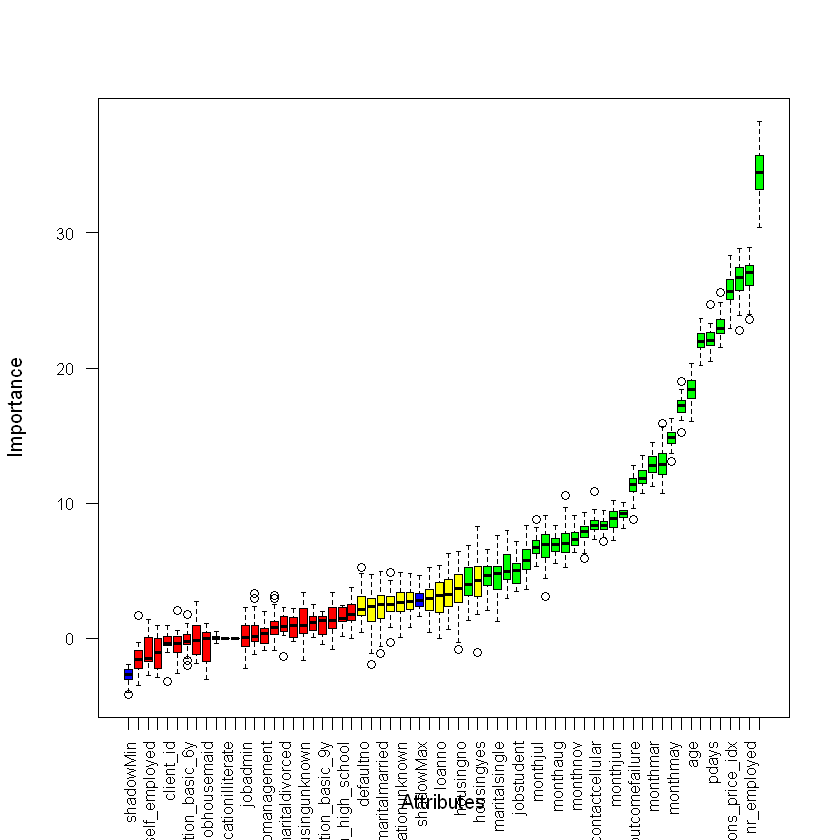

In [33]:
plot(boruta, las = 2, cex.axis = 0.8)

In [35]:
modelorf <- randomForest(subscribe~ age+campaign+cons_conf_idx+cons_price_idx+contactcellular, data=train.data, proximity=TRUE)

In [36]:
# Lets check how looks our RM Model
modelorf


Call:
 randomForest(formula = subscribe ~ age + campaign + cons_conf_idx +      cons_price_idx + contactcellular, data = train.data, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 10.79%
Confusion matrix:
      0   1 class.error
0 12609 271  0.02104037
1  1295 337  0.79350490

#### Prediction and Confussion Matrix

In [37]:
# Model Prediction
p <- predict(modelorf, test.data)
confusionMatrix(p, test.data$subscribe)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3170  323
         1   49   85
                                          
               Accuracy : 0.8974          
                 95% CI : (0.8871, 0.9071)
    No Information Rate : 0.8875          
    P-Value [Acc > NIR] : 0.02984         
                                          
                  Kappa : 0.2732          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.9848          
            Specificity : 0.2083          
         Pos Pred Value : 0.9075          
         Neg Pred Value : 0.6343          
             Prevalence : 0.8875          
         Detection Rate : 0.8740          
   Detection Prevalence : 0.9631          
      Balanced Accuracy : 0.5966          
                                          
       'Positive' Class : 0               
                        

## Model 3 Decision Treen

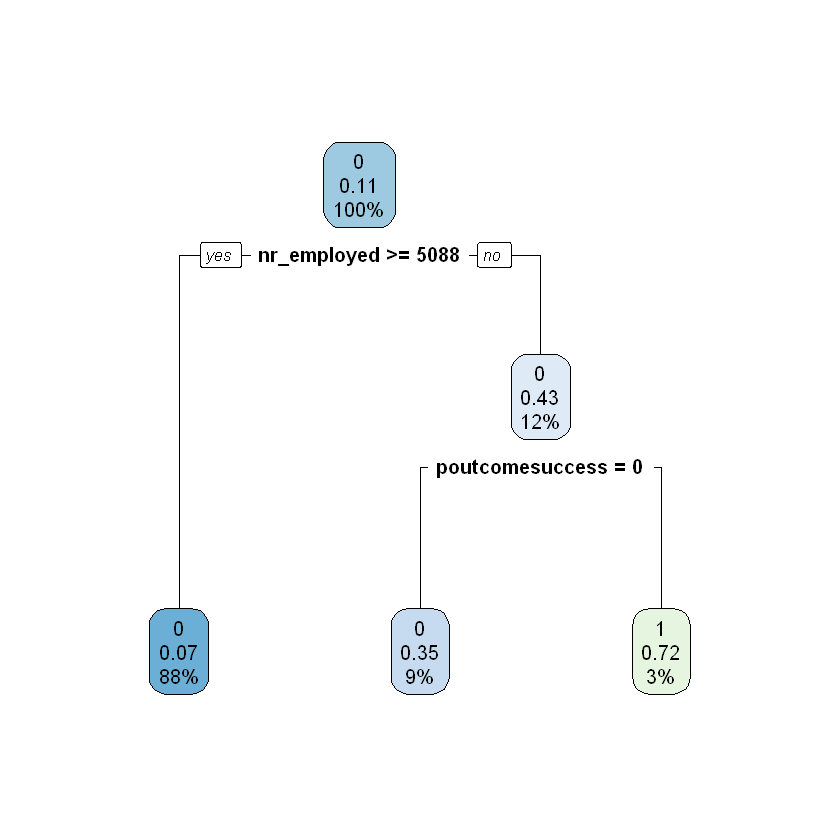

In [38]:
# Fit the model
modeldt <- rpart(subscribe~., data = train.data, method = 'class')
rpart.plot(modeldt)

In [131]:
modeldt

n= 14512 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 14512 1632 0 (0.88754135 0.11245865)  
  2) nr_employed>=5087.65 12779  880 0 (0.93113702 0.06886298) *
  3) nr_employed< 5087.65 1733  752 0 (0.56607040 0.43392960)  
    6) poutcomesuccess< 0.5 1343  471 0 (0.64929263 0.35070737) *
    7) poutcomesuccess>=0.5 390  109 1 (0.27948718 0.72051282) *

#### Prediction

In [39]:
pred <- predict(modeldt, test.data, type = 'class')

In [40]:
# Check if the customer will subscribe
ts <- table(test.data$subscribe, pred)
ts

   pred
       0    1
  0 3195   24
  1  325   83

#### Accuracy

In [42]:
accuracy<- sum(diag(ts)) / sum(ts)
accuracy

[1] 0.9037772

#### Cross Validation

In [49]:
set.seed(123)
form <- "subscribe~."
folds <- split(bank3, cut(sample(1:nrow(bank3)),10))
errs <- rep(NA, length(folds))


for (i in 1:length(folds)) {
 test <- ldply(folds[i], data.frame)
 train <- ldply(folds[-i], data.frame)
 tmp.model <- rpart(form , train.data, method = "class")
 tmp.predict <- predict(tmp.model, newdata = test.data, type = "class")
 conf.mat <- table(test.data$subscribe, tmp.predict)
 errs[i] <- 1-sum(diag(conf.mat))/sum(conf.mat)
}
print(sprintf("average error using k-fold cross-validation: %.3f percent", 100*mean(errs)))

[1] "average error using k-fold cross-validation: 9.622 percent"


## Model 4 Support Vector Machine

In [28]:
# Fit the Model
set.seed(1)
modelsvm = svm(formula = subscribe ~ ., data = train.data, type = 'C-classification', kernel = 'linear')

In [29]:
modelsvm


Call:
svm(formula = subscribe ~ ., data = train.data, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  6653


#### Prediction

In [30]:
# Make predictions on the test data
predicted.classessvm <- modelsvm %>% predict(test.data)

#### Accuracy

In [31]:
# Compute model accuracy rate
mean(predicted.classessvm == test.data$subscribe)

[1] 0.902123

#### Confusion Matrix

In [32]:
observed.classessvm<- test.data$subscribe
# Confusion matrix, number of cases
table(observed.classessvm, predicted.classessvm)

                   predicted.classessvm
observed.classessvm    0    1
                  0 3182   37
                  1  318   90

In [33]:
# Confusion matrix, proportion of cases
table(observed.classessvm, predicted.classes) %>%  prop.table() %>% round(digits = 3)

                   predicted.classes
observed.classessvm     0     1
                  0 0.877 0.010
                  1 0.083 0.030

#### Tunning Parameters and Cross Validation

In [19]:
# Fit the Model
set.seed(1)
modelsvmcv <- train(subscribe ~., data = train.data, method = "svmRadial", trControl = trainControl("cv", number = 10),
              preProcess = c("center","scale"), tuneLength = 10)

In [21]:
modelsvmcv

Support Vector Machines with Radial Basis Function Kernel 

14512 samples
   63 predictor
    2 classes: '0', '1' 

Pre-processing: centered (63), scaled (63) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 13061, 13061, 13061, 13061, 13061, 13060, ... 
Resampling results across tuning parameters:

  C       Accuracy   Kappa    
    0.25  0.8971192  0.2528635
    0.50  0.8982216  0.2483853
    1.00  0.8982214  0.2516757
    2.00  0.8976013  0.2725579
    4.00  0.8980838  0.3005510
    8.00  0.8953969  0.3078217
   16.00  0.8920891  0.3075725
   32.00  0.8883681  0.3057921
   64.00  0.8804434  0.2844939
  128.00  0.8721057  0.2712159

Tuning parameter 'sigma' was held constant at a value of 0.01018875
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.01018875 and C = 0.5.

In [20]:
# Print the best tuning parameter sigma and C that
# maximizes model accuracy
modelsvmcv$bestTune

,sigma,C
,<dbl>,<dbl>
2,0.01018875,0.5


#### Tunned Confusion Matrix

In [25]:
observed.classes <- test.data$subscribe
# Confusion matrix, number of cases
table(observed.classes, predictedt.classes)

                predictedt.classes
observed.classes    0    1
               0 3193   26
               1  319   89

In [26]:
# Confusion matrix, proportion of cases
table(observed.classes, predictedt.classes) %>% 
  prop.table() %>% round(digits = 3)

                predictedt.classes
observed.classes     0     1
               0 0.880 0.007
               1 0.088 0.025

#### Tunned Accuracy

In [23]:
# Make predictions on the test data
predictedt.classes <- modelsvmcv %>% predict(test.data)

In [24]:
# Compute model accuracy rate
mean(predictedt.classes == test.data$subscribe)

[1] 0.9048801

## Model 5 Naive Bayes

In [34]:
modelnb <- naive_bayes(subscribe ~ ., data = train.data, usekernel = T) 
modelnb


================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = subscribe ~ ., data = train.data, 
    usekernel = T)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

        0         1 
0.8875413 0.1124587 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: client_id::0 (KDE)
--------------------------------------------------------------------------------- 

Call:
	density.default(x = x, na.rm = TRUE)

Data: x (12880 obs.);	Bandwidth 'bw' = 1616

       x               y            
 Min.   :-4844   Min.   :3.352e-08  
 1st Qu.: 7875   1st Qu.:1.981e-05  
 Median :20594   Median :2.401e-05  
 Mean   :20594   Mean   :1.964e-05

In [36]:
pre <- predict(modelnb, train.data, type = 'prob')
head(cbind(pre, train.data))

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."


,0,1,client_id,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,⋯,monthoct,monthsep,day_of_weekfri,day_of_weekmon,day_of_weekthu,day_of_weektue,day_of_weekwed,poutcomefailure,poutcomenonexistent,poutcomesuccess
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,8.252105e-21,29925,42,1,999.0000,0,1.4,93.918,-42.7,⋯,0,0,0,0,1,0,0,0,1,0
2,1,1.120065e-21,37529,35,4,999.0000,0,1.4,94.465,-41.8,⋯,0,0,0,1,0,0,0,0,1,0
3,1,7.951909e-19,2757,44,1,999.0000,0,-1.8,92.893,-46.2,⋯,0,0,0,1,0,0,0,0,1,0
4,1,8.526442e-18,9642,45,1,999.0000,0,-1.8,93.075,-47.1,⋯,0,0,0,0,0,1,0,0,1,0
5,1,1.459683e-22,14183,45,1,999.0000,0,1.1,93.994,-36.4,⋯,0,0,0,0,0,0,1,0,1,0
7,1,2.069620e-15,27168,33,1,961.4132,1,-1.8,93.075,-47.1,⋯,0,0,1,0,0,0,0,1,0,0


#### Confusion Matrix Train Data

In [37]:

pre1 <- predict(modelnb, train.data)
(tab1 <- table(pre1, train.data$subscribe))

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."


    
pre1     0     1
   0 12880  1632
   1     0     0

#### Accuracy Train

In [49]:
1 - sum(diag(tab1)) / sum(tab1)

[1] 0.1135554

In [50]:
100 - 0.113555402787326

[1] 99.88644

#### Confusion Matrix Test Data

In [38]:
pre2 <- predict(modelnb, test.data)
(tab2 <- table(pre2, test.data$subscribe))

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."


    
pre2    0    1
   0 3219  408
   1    0    0

#### Accuracy Test

In [52]:
1 - sum(diag(tab2)) / sum(tab2)

[1] 0.1135284

In [53]:
100 - 0.113528382095524

[1] 99.88647